In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [59]:
df=pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/Biomass_data_for_subnational_administrative_areas_India.csv")

In [60]:
df.drop(["Unnamed: 0", 'Total area (ha)'],axis=1,inplace=True)
df.rename({'Administrative area\t': 'State/UT'}, axis = 1, inplace = True)
df.loc[13,'State/UT'] = 'Jammu & Kashmir'
df.loc[0,'State/UT'] = 'Andaman & Nicobar'
df.loc[23,'State/UT'] = 'Delhi'
df.loc[12,'State/UT'] = 'Himachal Pradesh'

df = df.sort_values('Avg biomass per ha (Mt)', ascending = False)
df.head()

,State/UT,Tree cover\tExtent in 2010 (ha),Carbon biomass(Mt),Avg biomass per ha (Mt),Avg annual\temissions 2001-10 (Mt),Avg annual emissions 2011-18 (Mt)
2,Arunachal Pradesh,6119808,1844684647,292.0,2046119,3079332
0,Andaman & Nicobar,680192,188271746,275.0,379438,94293
29,Sikkim,254097,65577734,261.0,14739,16971
24,Nagaland,1319972,342532920,261.0,1790822,3565702
34,Uttarakhand,1733960,507773181,260.0,173051,172713


In [30]:
color_max = df['Avg biomass per ha (Mt)'].max()

fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UT',
    color='Avg biomass per ha (Mt)',
    range_color=(0, color_max),
    color_continuous_scale='plasma',     
    title= 'AVERAGE BIOMASS PER HECTARE IN METRIC TON',
    basemap_visible = False,
    height = 700,
    width = 1400,
      )

## Adding annotations
fig.add_scattergeo(
  geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
  locations = df['State/UT'],
  text = df['Avg biomass per ha (Mt)'],
  featureidkey="properties.ST_NM",
  mode = 'text',
  textfont = dict(family="sans serif", size=12, color="black"))

fig.update_geos(fitbounds="locations", visible=False)

#Adjusting the figure layout
fig.update_layout(coloraxis=dict(colorbar_x=0.7,
                                 colorbar_y=0, 
                                 colorbar_len=0.75, 
                                 colorbar_thickness=20,
                                colorbar_yanchor = 'bottom'))
fig.update_layout(title_text='AVERAGE BIOMASS PER HECTARE IN METRIC TON', title_x=0.5)

fig.write_image(file='BIOMASS_Map.png', format='png',scale=10)
fig.write_html("BIOMASS_Map.html")


fig.show()

*Interpretation : The above density map shows that the North-Eastern region of the country holds the highest average biomass per hectare for the year 2018 followed by the Northern States like Uttarakhand, Uttar Pradesh, Himachal Pradesh and Jammu & Kashmir and Southern States like Karnataka, Kerala and Goa. Rest of the states have an average biomass per hectare ranging from 200-120Mt.*

In [31]:
df.head()

,State/UT,Tree cover\tExtent in 2010 (ha),Carbon biomass(Mt),Avg biomass per ha (Mt),Avg annual\temissions 2001-10 (Mt),Avg annual emissions 2011-18 (Mt)
2,Arunachal Pradesh,6119808,1844684647,292.0,2046119,3079332
0,Andaman & Nicobar,680192,188271746,275.0,379438,94293
29,Sikkim,254097,65577734,261.0,14739,16971
24,Nagaland,1319972,342532920,261.0,1790822,3565702
34,Uttarakhand,1733960,507773181,260.0,173051,172713


In [34]:
df['Difference'] = ((df['Avg annual emissions 2011-18 (Mt)'] - df['Avg annual\temissions 2001-10 (Mt)'])/df['Avg annual\temissions 2001-10 (Mt)'])*100

In [35]:
df

,State/UT,Tree cover\tExtent in 2010 (ha),Carbon biomass(Mt),Avg biomass per ha (Mt),Avg annual\temissions 2001-10 (Mt),Avg annual emissions 2011-18 (Mt),Difference
2,Arunachal Pradesh,6119808,1844684647,292.0,2046119,3079332,50.496232
0,Andaman & Nicobar,680192,188271746,275.0,379438,94293,-75.149300
29,Sikkim,254097,65577734,261.0,14739,16971,15.143497
24,Nagaland,1319972,342532920,261.0,1790822,3565702,99.109794
34,Uttarakhand,1733960,507773181,260.0,173051,172713,-0.195318
20,Manipur,1711044,432136552,253.0,1160070,3256213,180.691079
33,Uttar Pradesh,370632,86520498,240.0,52842,32897,-37.744597
12,Himachal Pradesh,1149441,324786617,237.0,78309,32922,-57.958855
22,Mizoram,1814071,456279696,236.0,898461,4169918,364.117864
15,Karnataka,1884633,514651959,226.0,433168,516482,19.233646


In [36]:
df.drop([8, 17],axis=0,inplace=True)

In [38]:
df = df.sort_values('Difference', ascending = False)

In [55]:
df

,State/UT,Tree cover\tExtent in 2010 (ha),Carbon biomass(Mt),Avg biomass per ha (Mt),Avg annual\temissions 2001-10 (Mt),Avg annual emissions 2011-18 (Mt),Difference
22,Mizoram,1814071,456279696,236.0,898461,4169918,364.117864
16,Kerala,2270278,580909883,224.0,382432,1123204,193.700318
20,Manipur,1711044,432136552,253.0,1160070,3256213,180.691079
21,Meghalaya,1595555,365306441,216.0,1213836,2953875,143.350420
24,Nagaland,1319972,342532920,261.0,1790822,3565702,99.109794
3,Assam,2570919,540167021,196.0,2037451,3137837,54.007974
9,Goa,117102,31303528,213.0,6472,9787,51.220643
2,Arunachal Pradesh,6119808,1844684647,292.0,2046119,3079332,50.496232
26,Puducherry,5616,1256209,180.0,1085,1575,45.161290
32,Tripura,571578,131231794,195.0,754223,1085428,43.913405


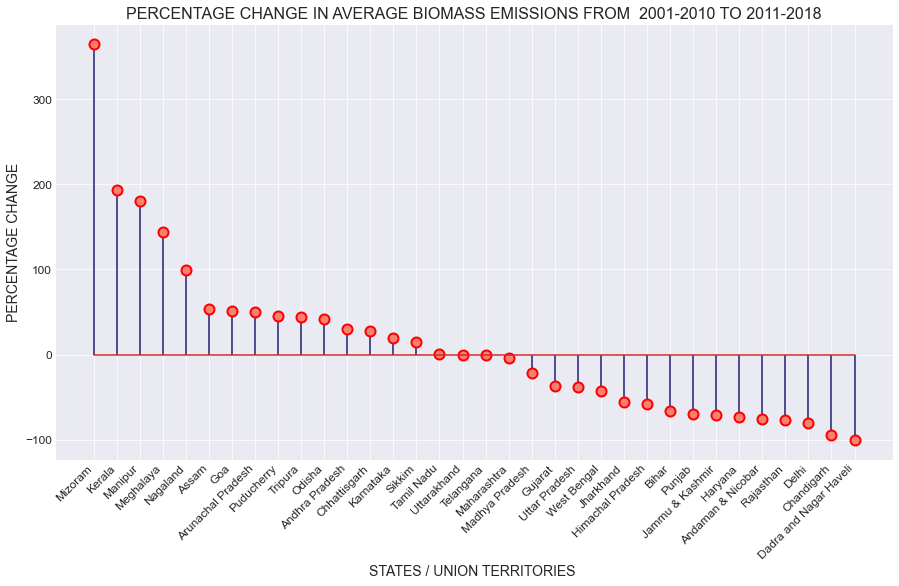

In [53]:
plt.figure(figsize=(15,8))                                  
plt.style.use("seaborn-darkgrid")

y = df['Difference']
x = df['State/UT']
width = 0.5

#Formatting marker and baselines
(markers, stemlines, baseline) = plt.stem(x, y, markerfmt='o', linefmt='midnightblue')
plt.setp(markers, marker='o', markersize=10, markeredgecolor="red", markeredgewidth=2)

plt.xticks(x,rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize = 12)
plt.ticklabel_format(axis="y", style='plain')
plt.title("PERCENTAGE CHANGE IN AVERAGE BIOMASS EMISSIONS FROM  2001-2010 TO 2011-2018", fontsize=16)
plt.xlabel("STATES / UNION TERRITORIES ", fontsize = 14)
plt.ylabel("PERCENTAGE CHANGE", fontsize = 14)
markers.set_markerfacecolor('salmon')


### dpi increases resolution of the picture
plt.savefig('PERCENTAGE_CHANGE_IN_AVERAGE_BIOMASS_EMISSIONS.png',transparent=False, bbox_inches='tight', pad_inches=0, dpi = 1200)     
plt.show()
plt.close()

*Interpretation :  The above graphs shows that there has been an increase in the rate of biomass emission from 2011-2018 as compared to 2001 - 2011. Mizoram depicts the highest positive change with a percentage of 300. Kerala, Manipur and Meghalaya indicate a postive change of more than 100%. The state Telangana barely reflects any change in the two given timelines. Also there has been seen a decrease in the biomass emitions for the two periods with Dadra and Nagar Haveli accounting for the most decrease of 100% followed by the Union Terretories Chandigarh and Delhi.*